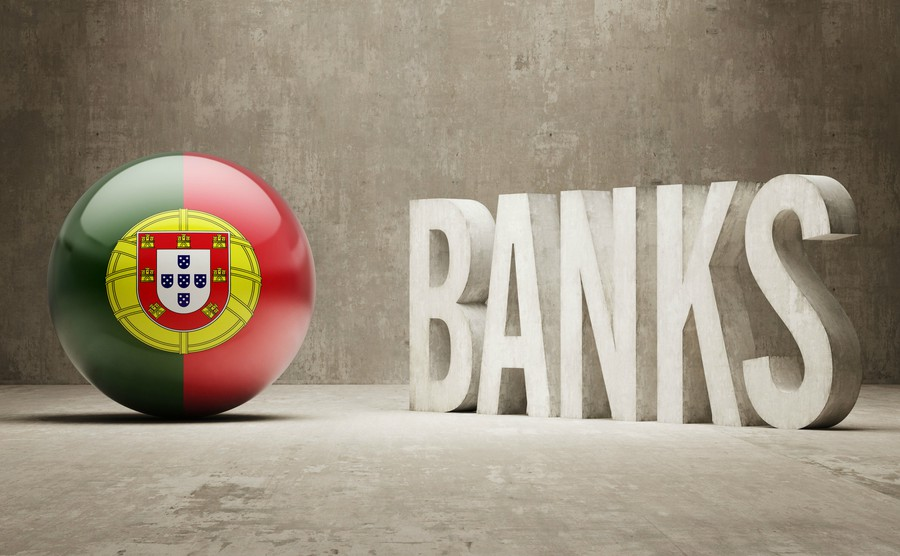

In [1]:
from IPython.display import Image
Image(filename='Portugal-High-Resolution-Banks-Concept.jpg') 

## Insights of the data 

### Relevant Information 

### Data Attributes 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


**Attribute Information:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - balance: balance od the customer

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

<a id='import_lib'></a>
## 1. Import Libraries

In [4]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 


# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

<a id='set_options'></a>
## 2. Set Options

In [5]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

In [6]:
df=pd.read_csv('bank-full.csv',sep=';')

In [7]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

<a id='data_preparation'></a>
## 4. Data Analysis and Preparation

<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

In [210]:
df.shape

(45211, 17)

#### Inference: There are 45211 rows and 17 types of variables in bank marketing data.

<a id='Data_Types'></a>
### 4.1.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

**1. Check data types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics
**1. For numerical variables, we use .describe()**

In [9]:
df.describe()

age       balance          day     duration     campaign  \
count 45211.000000  45211.000000 45211.000000 45211.000000 45211.000000   
mean     40.936210   1362.272058    15.806419   258.163080     2.763841   
std      10.618762   3044.765829     8.322476   257.527812     3.098021   
min      18.000000  -8019.000000     1.000000     0.000000     1.000000   
25%      33.000000     72.000000     8.000000   103.000000     1.000000   
50%      39.000000    448.000000    16.000000   180.000000     2.000000   
75%      48.000000   1428.000000    21.000000   319.000000     3.000000   
max      95.000000 102127.000000    31.000000  4918.000000    63.000000   

             pdays     previous  
count 45211.000000 45211.000000  
mean     40.197828     0.580323  
std     100.128746     2.303441  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000   275.000000

**2. For categorical features, we use .describe(include=object)**

In [10]:
df.describe(include='object')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

<a id='Missing_Values'></a>
### 4.1.4 Missing Values

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**There are no missing values in the dataset**

### Visualize Missing Values using Heatmap

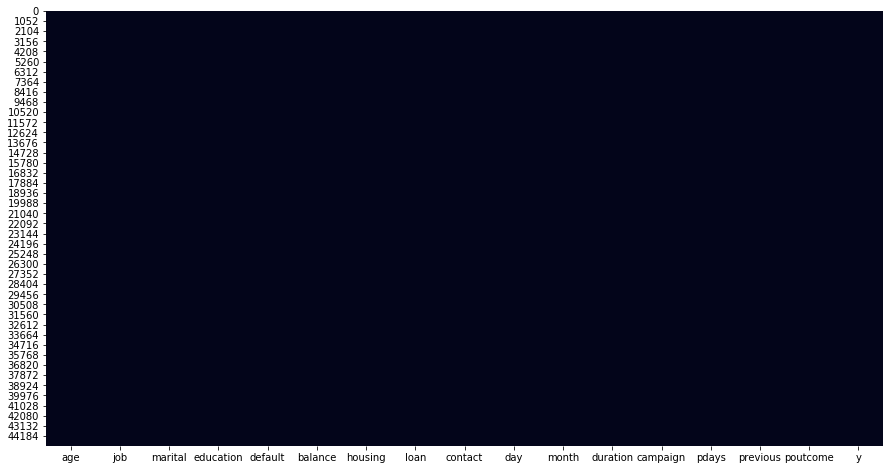

In [215]:
plt.figure(figsize=(15, 8))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

<a id='correlation'></a>
### 4.1.5 Correlation

#### Corelation heatmap

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

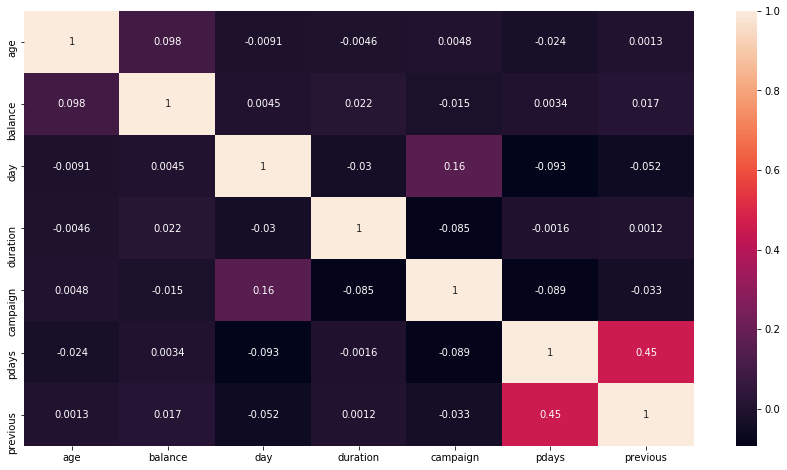

In [216]:
cor=df.corr()
plt.figure(figsize=(15, 8))

sns.heatmap(cor,annot=True)

plt.show()

**This reveals a clear relationship among age, balance, duration, and campaign.**

        To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

In [12]:
df.describe(include=object)

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

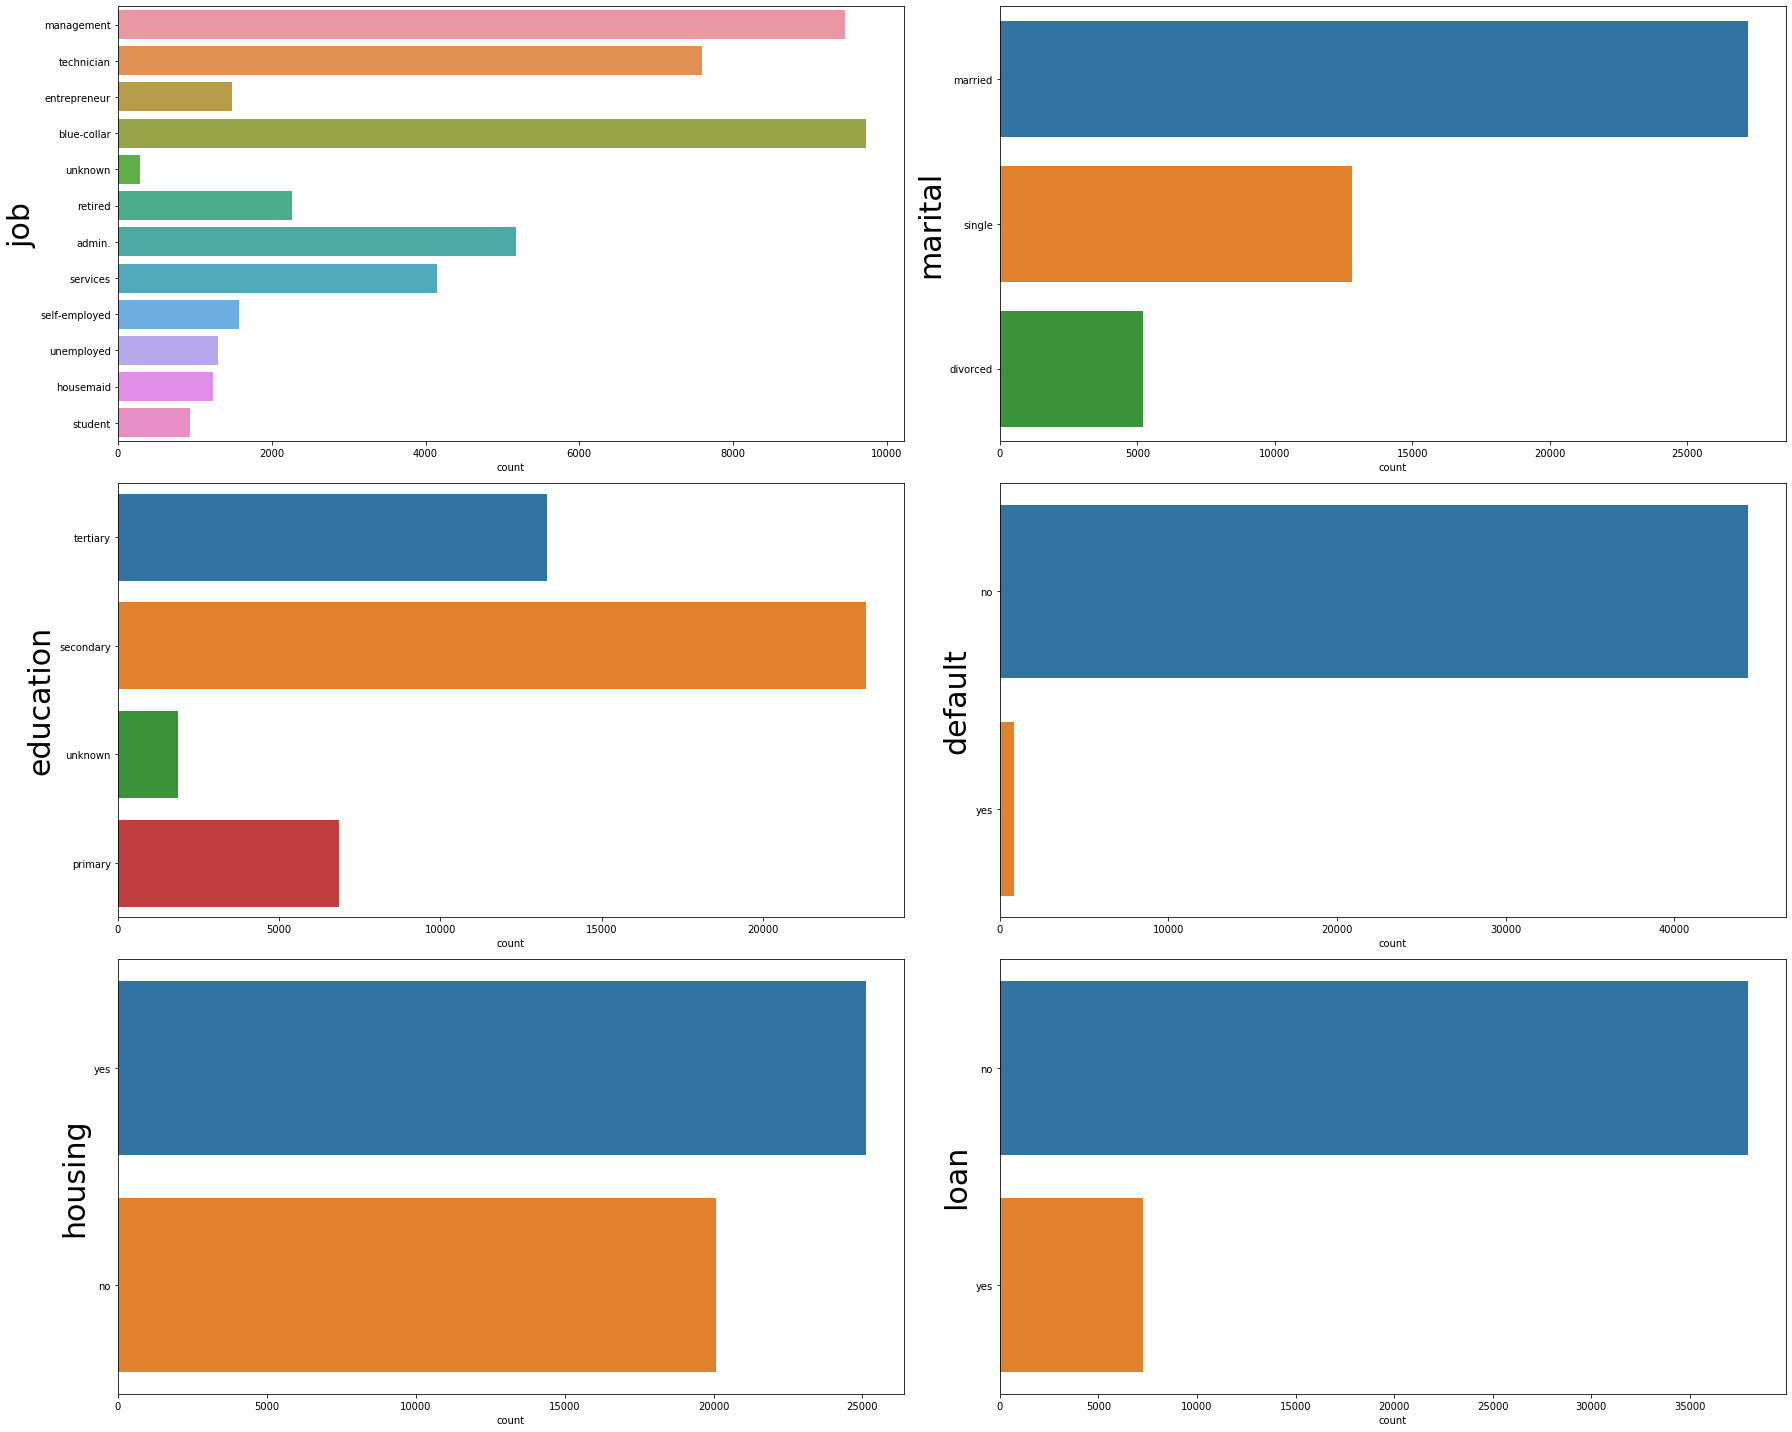

In [13]:
df_categoric_features = df.select_dtypes(include='object').drop(['y'], axis=1)
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30) 
plt.tight_layout()   
plt.show()

In [14]:
for i in df_categoric_features:
    print(i.upper())
    print(df[i].value_counts())
    print( )

JOB
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

MARITAL
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

EDUCATION
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

DEFAULT
no     44396
yes      815
Name: default, dtype: int64

HOUSING
yes    25130
no     20081
Name: housing, dtype: int64

LOAN
no     37967
yes     7244
Name: loan, dtype: int64

CONTACT
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

MONTH
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

POUTCOME
unknown    36959
failure

<a id='numerical'></a>
### 4.1.6 Analyze Numerical Variables

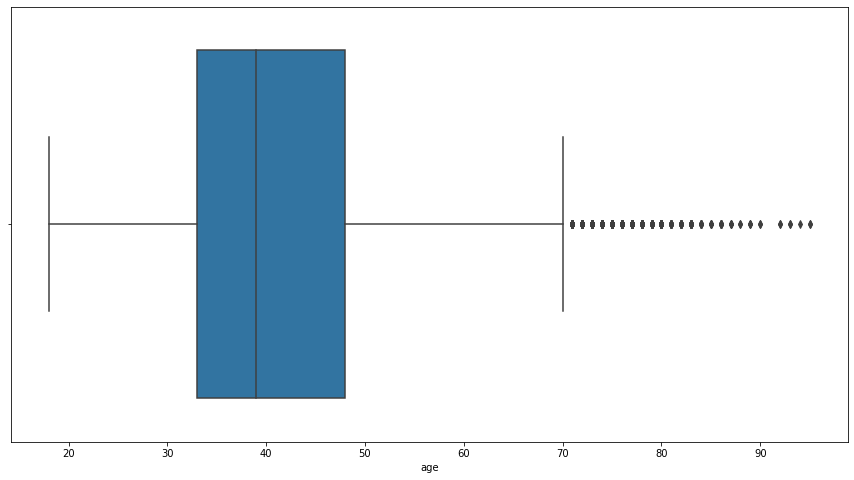

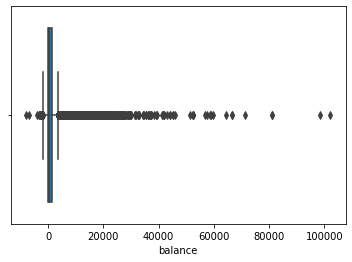

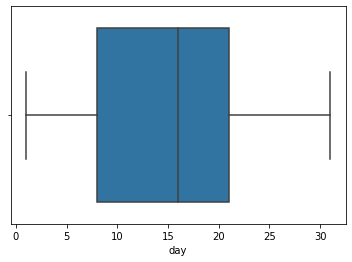

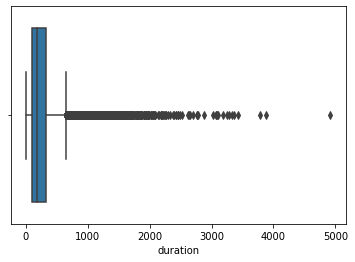

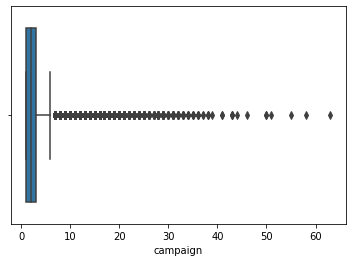

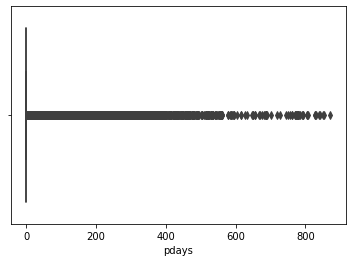

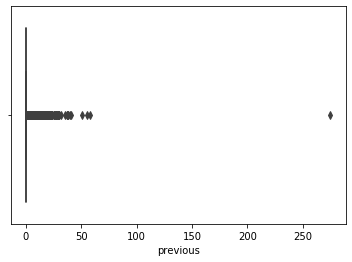

In [15]:
df_num=df.select_dtypes(include=np.number)
plt.figure(figsize=(15, 8))
for i in df_num:
    sns.boxplot(df[i])
    plt.show()

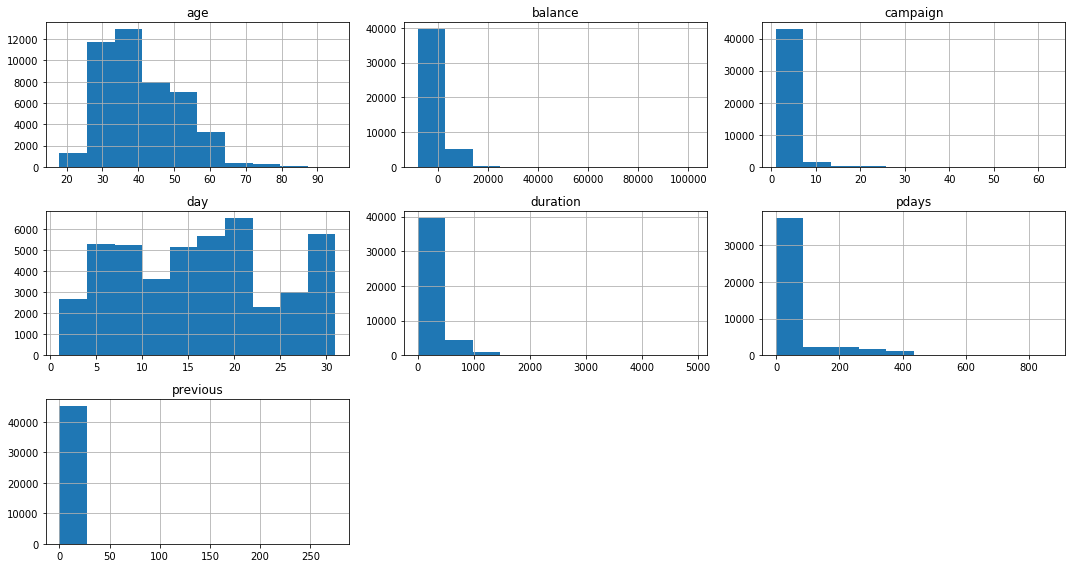

Skewness:


age         0.684818
balance     8.360308
day         0.093079
duration    3.144318
campaign    4.898650
pdays       2.615715
previous   41.846454
dtype: float64

In [16]:
plt.rcParams['figure.figsize'] = [15,8]
df.drop('y', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df.drop('y', axis = 1).skew()

<a id='Scaling the data'></a>
###  4.1.7 Scaling The Data

In [17]:
df_num=df.select_dtypes(include=np.number)
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
X = pd.DataFrame(num_scaled, columns = df_num.columns)
X.head()

age   balance       day  duration  campaign     pdays  previous
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453 -0.251940
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453 -0.251940
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453 -0.251940
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453 -0.251940
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453 -0.251940

In [18]:
X.shape

(45211, 7)

In [19]:
X.skew()

age         0.684818
balance     8.360308
day         0.093079
duration    3.144318
campaign    4.898650
pdays       2.615715
previous   41.846454
dtype: float64

<a id='encoding'></a>
### Encoding the categorical variable

In [20]:
df_cat=df.select_dtypes(exclude=np.number)

In [21]:
df_cat.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no

In [22]:
df_cat=df_cat.drop('y',axis=1)

In [23]:
df_cat.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome  
0  unknown  
1  unknown  
2  unknown  
3  unknown  
4  unknown

In [24]:
X_encode=pd.get_dummies(df_cat,columns=df_cat.columns)
X_encode.head()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               1               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            1                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    0   
1                0               1                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    0   
4                0               1                  0                    0   

   education_tertiary  education_unknown  default_no  default_yes  housing_no  \
0                   1                  0           1            0           0   
1                   0                  0           1            0           0   
2                   0                  0           1            0           0   
3                   0                  1           1            0           0   
4                   0                  1           1            0           1   

   housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0            1        1         0                 0                  0   
1            1        1         0                 0                  0   
2            1        0         1                 0                  0   
3            1        1         0                 0                  0   
4            0        1         0                 0                  0   

   contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                1          0          0          0          0          0   
1                1          0          0          0          0          0   
2                1          0          0          0          0          0   
3                1          0          0          0          0          0   
4                1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcom

In [25]:
X_encode.shape

(45211, 44)

In [26]:
X.shape

(45211, 7)

In [27]:
x=pd.concat([X,X_encode],axis=1)

In [28]:
x.shape

(45211, 51)

In [29]:
x.head()

age   balance       day  duration  campaign     pdays  previous  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453 -0.251940   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453 -0.251940   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453 -0.251940   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453 -0.251940   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453 -0.251940   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               1               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            1                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    0   
1                0               1                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    0   
4                0               1                  0                    0   

   education_tertiary  education_unknown  default_no  default_yes  housing_no  \
0                   1                  0           1            0           0   
1                   0                  0           1            0           0   
2                   0                  0           1            0           0   
3                   0                  1           1            0           0   
4                   0                  1           1            0           1   

   housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0            1        1         0                 0                  0   
1            1        1         0                 0                  0   
2            1        0         1                 0                  0   
3            1        1         0                 0                  0   
4            0        1         0                 0                  0   

   contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                1          0          0          0          0          0   
1                1          0          0          0          0          0   
2                1          0          0          0          0          0   
3                1          0          0          0          0          0   
4                1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1

<a id='Target variable'></a>
### 4.1.8 Target variable

In [31]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [32]:
y=df['y']
for i in range(len(y)):
    if y[i] == 'yes':
        y[i] = 1
    else:
        y[i] = 0 
y=y.astype('int')
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

<a id='imbalance data'></a>
# Handling the imbalanced data

In [33]:
from imblearn.over_sampling import SMOTE 
SM = SMOTE(random_state=42)
X_sm, y_sm = SM.fit_resample(x, y)
y_sm.value_counts()

1    39922
0    39922
Name: y, dtype: int64

<a id='Train test split'></a>
# Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size =   0.3, random_state = 10) 

<a id='log_full model'></a>
# Logistic Regression Full Model

In [61]:
score_card = pd.DataFrame(columns=["Model Name",'Prob.Cutoff',"Stability","r2_score", 'AUC', 'Precision', 'Recall',
                                       'Accuracy', 'Kappa', 'f1-score'])
def update_score_card(Model_name,model,cutoff='-',stability="Stable"):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":model.prsquared,
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

In [38]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [39]:
def logisticRegression(x,y,lr):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =   0.3, random_state = 10) 
    
    # describes info about train and test set 
    print("Number transactions X_train dataset: ", X_train.shape) 
    print("Number transactions y_train dataset: ", y_train.shape) 
    print("Number transactions X_test dataset: ", X_test.shape) 
    print("Number transactions y_test dataset: ", y_test.shape) 
    
    # train the model on train set 
    lr.fit(X_train, y_train) 
    
    predictions = lr.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, predictions)) 

    cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot() 

In [40]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Bank marketing Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [41]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [42]:
import statsmodels.api as sm
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.274267
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                55890
Model:                          Logit   Df Residuals:                    55839
Method:                           MLE   Df Model:                           50
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.6043
Time:                        09:27:55   Log-Likelihood:                -15329.
converged:                       True   LL-Null:                       -38740.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0369      0.020     -1.850      0.064      -0.076       0.002
ba

In [43]:
print('AIC: ',logreg.aic)

AIC:  30759.52975973241


In [44]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

Odds
age                    0.963790
balance                0.927981
day                    1.048672
duration               4.430799
campaign               0.623401
pdays                  1.178803
previous               1.118828
job_admin.             0.034350
job_blue-collar        0.034071
job_entrepreneur       0.011805
job_housemaid          0.010567
job_management         0.039692
job_retired            0.063708
job_self-employed      0.012847
job_services           0.024844
job_student            0.062388
job_technician         0.031081
job_unemployed         0.016950
job_unknown            0.015263
marital_divorced       0.155851
marital_married        0.194590
marital_single         0.249211
education_primary      0.139798
education_secondary    0.210956
education_tertiary     0.252288
education_unknown      0.102688
default_no          9113.489536
default_yes         4230.357003
housing_no             1.111770
housing_yes            0.454161
loan_no                1.377281
loan_yes               0.494801
contact_cellular       1.360585
contact_telephone      0.644458
contact_unknown        0.185538
month_apr              0.040865
month_aug              0.014973
month_dec              0.046870
month_feb              0.030035
month_jan              0.005765
month_jul              0.012455
month_jun              0.056961
month_mar              0.149884
month_may              0.026640
month_nov              0.012940
month_oct              0.096980
month_sep              0.068225
poutcome_failure       0.314954
poutcome_other         0.315690
poutcome_success       4.253776
poutcome_unknown       0.926791

In [45]:
y_pred_prob = logreg.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

TPR      FPR  Threshold  Difference
0 0.902973 0.101950   0.416558    0.801023
1 0.901224 0.100276   0.421454    0.800948
2 0.901308 0.100360   0.421231    0.800948
3 0.902723 0.101783   0.417464    0.800941
4 0.902807 0.101867   0.417021    0.800940

In [46]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

55580   0.980103
68744   0.225067
37691   0.014717
44700   0.129033
4715    0.027334
dtype: float64

In [47]:
y_pred_prob = logreg.predict(X_test)
y_pred = [ 0 if x < 0.69 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     11947
           1       0.95      0.79      0.86     12007

    accuracy                           0.87     23954
   macro avg       0.88      0.87      0.87     23954
weighted avg       0.88      0.87      0.87     23954



## Confusion matrix

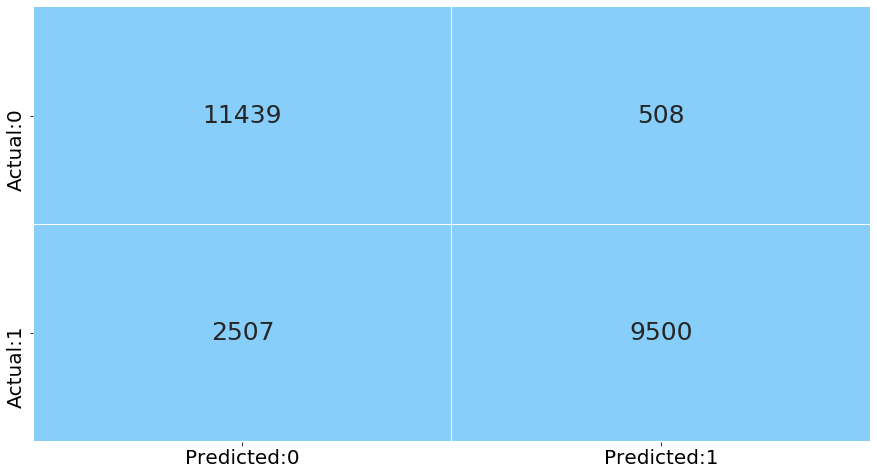

In [48]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [49]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [50]:
precision = TP / (TP+FP)
print('Precision:',precision)
recall = TP / (TP+FN)
print('Recall:',recall)
specificity = TN / (TN+FP)
print('Specificity:',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('f1_score:',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy:',accuracy)

Precision: 0.9492406075139888
Recall: 0.7912051303406347
Specificity: 0.9574788649870261
f1_score: 0.8630479218714513
Accuracy: 0.8741337563663689


In [51]:
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.7483711298103455


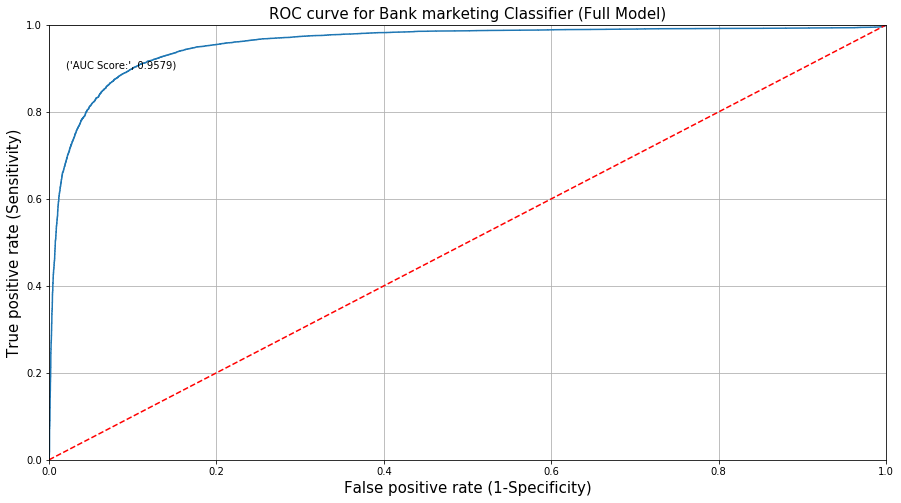

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Bank marketing Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [62]:
update_score_card("Simple Logistic Regression",logreg,cutoff=0.69,stability="Stable")

Model Name  Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression     0.690000    Stable  0.604316 0.957852   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048

<a id='guassiannb_model'></a>
# Guassian naive bayes model

In [64]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

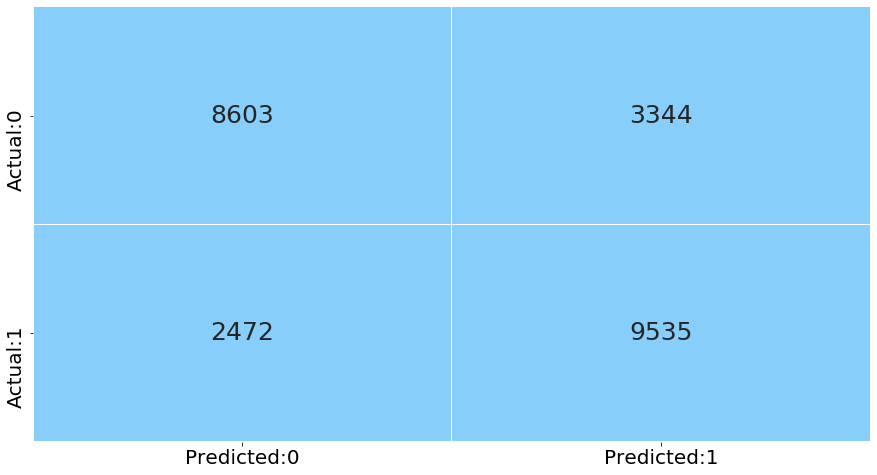

In [55]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
plot_confusion_matrix(gnb_model)

In [56]:
test_report = get_test_report(gnb_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     11947
           1       0.74      0.79      0.77     12007

    accuracy                           0.76     23954
   macro avg       0.76      0.76      0.76     23954
weighted avg       0.76      0.76      0.76     23954



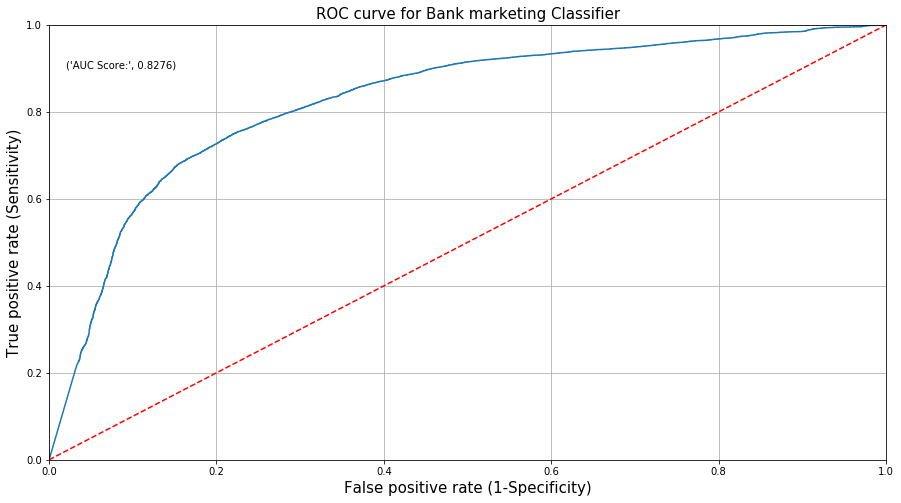

In [57]:
plot_roc(gnb_model)

In [65]:
update_score_card("gNB Classifier",gnb_model,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294

<a id='knn_model'></a>
# KNN model

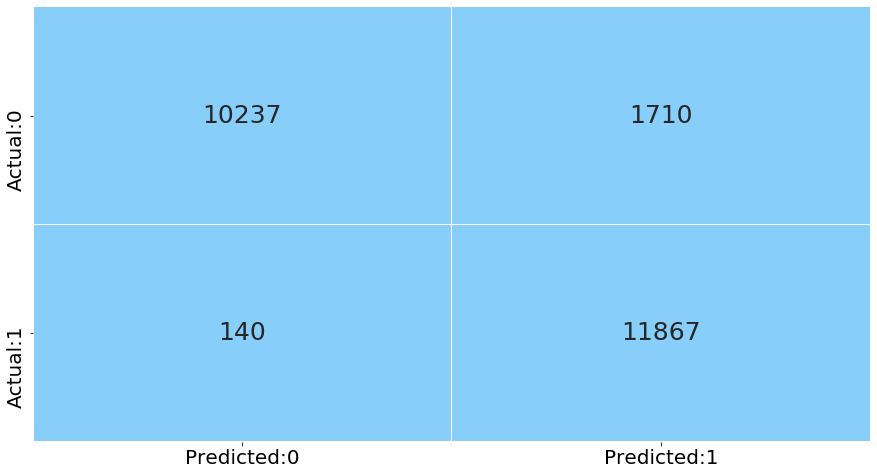

In [66]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)
plot_confusion_matrix(knn_model)

In [67]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     11947
           1       0.87      0.99      0.93     12007

    accuracy                           0.92     23954
   macro avg       0.93      0.92      0.92     23954
weighted avg       0.93      0.92      0.92     23954



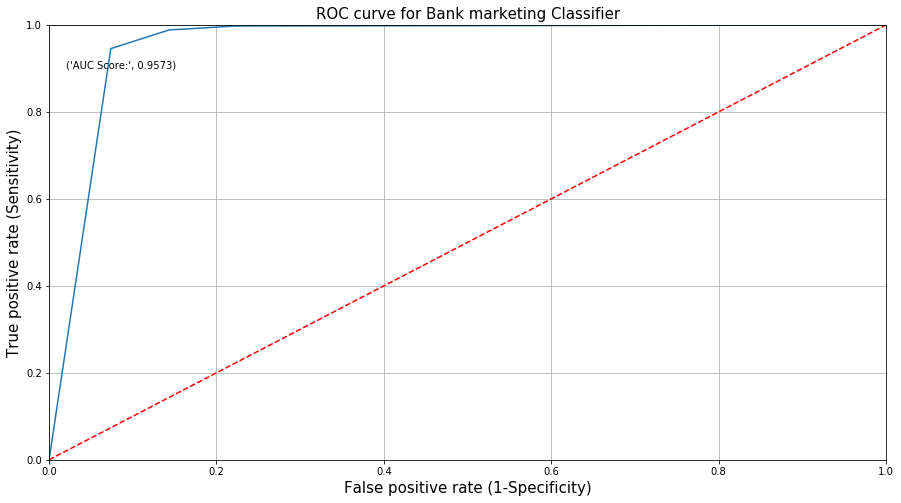

In [68]:
plot_roc(knn_model)

In [69]:
update_score_card("KNN Classifier",knn_model,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689

<a id='decisiontree'></a>
# DECISION TREE

In [36]:
decision_tree_classification =DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.229662 to fit



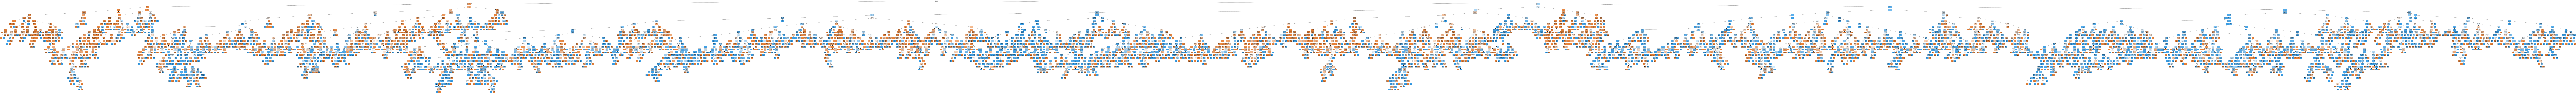

In [37]:
labels = X_train.columns
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"], filled = True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [73]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11947
           1       0.90      0.92      0.91     12007

    accuracy                           0.91     23954
   macro avg       0.91      0.91      0.91     23954
weighted avg       0.91      0.91      0.91     23954



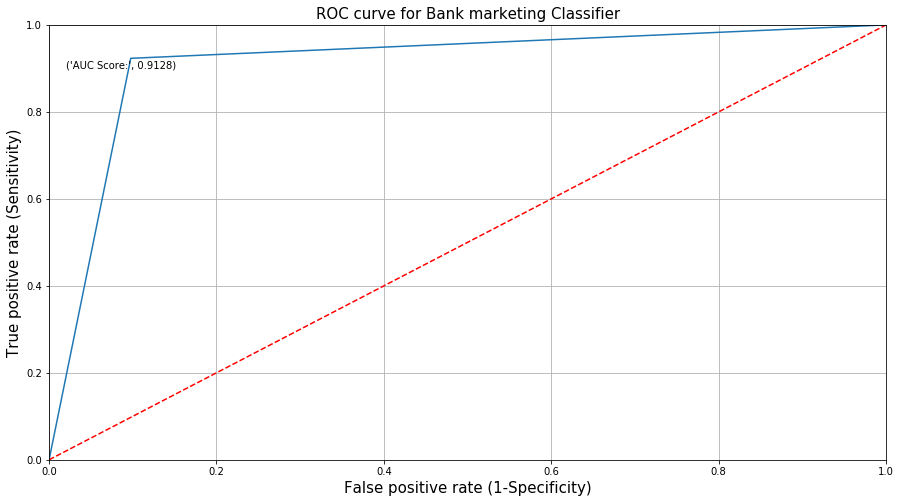

In [74]:
plot_roc(decision_tree)

In [75]:
update_score_card("Decision Tree Classifier",decision_tree,stability="Good")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925

<a id='randomforest'></a>

# RANDOM FOREST

In [79]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [80]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11947
           1       0.93      0.94      0.94     12007

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



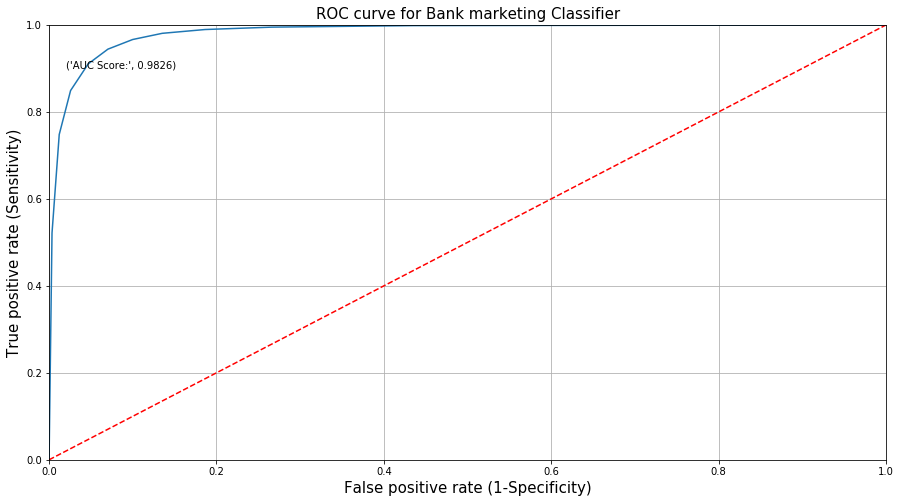

In [81]:
plot_roc(rf_classification)

In [82]:
update_score_card("Random Forest Classifier",rf_model,stability="Good")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   
4    Random Forest Classifier           -      Good  0.748015 0.982624   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925  
4   0.931023 0.944283  0.937004 0.874003  0.937606

<a id='boosting'></a>

# BOOSTING TECHNIQUES

<a id='ADAboost'></a>

## ADABoost

In [83]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

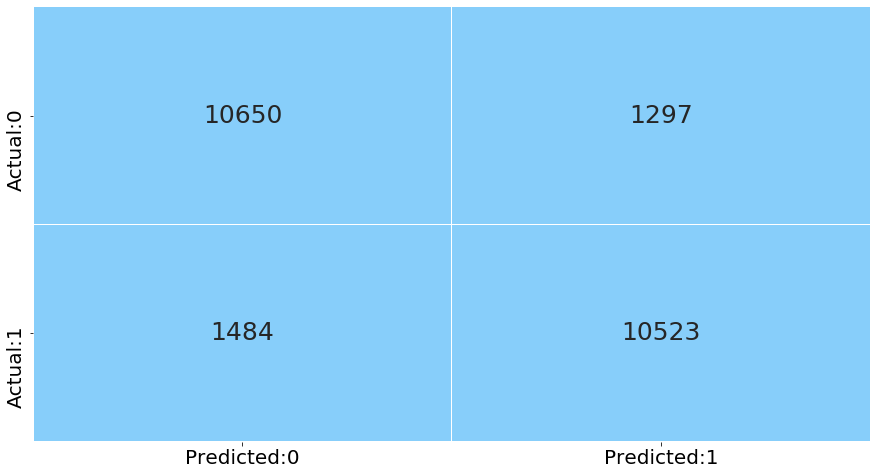

In [84]:
plot_confusion_matrix(ada_model)

In [85]:
test_report = get_test_report(ada_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     11947
           1       0.89      0.88      0.88     12007

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.88     23954
weighted avg       0.88      0.88      0.88     23954



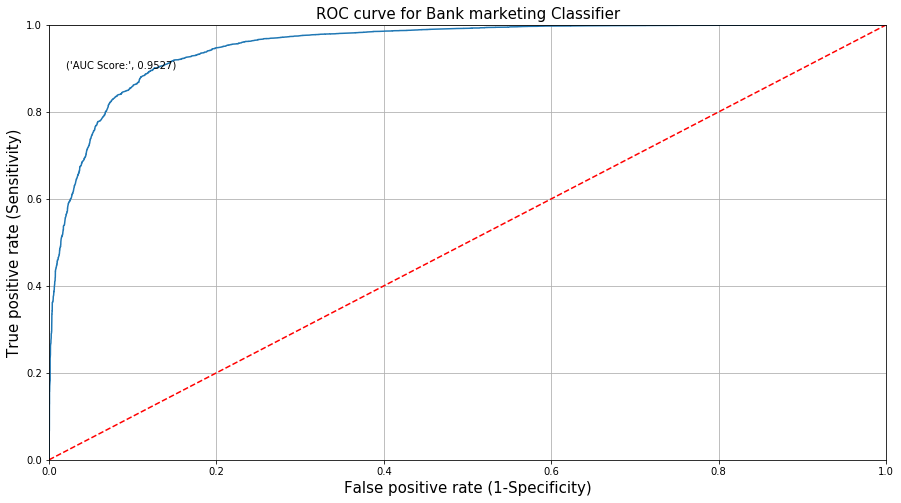

In [86]:
plot_roc(ada_model)

In [87]:
update_score_card("ADAboost classifier",ada_model,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   
4    Random Forest Classifier           -      Good  0.748015 0.982624   
5         ADAboost classifier           -  Moderate  0.535607 0.952731   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925  
4   0.931023 0.944283  0.937004 0.874003  0.937606  
5   0.890271 0.876405  0.883902 0.767813  0.883284

<a id='gradboost'></a>

## Gradient Boost

In [88]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

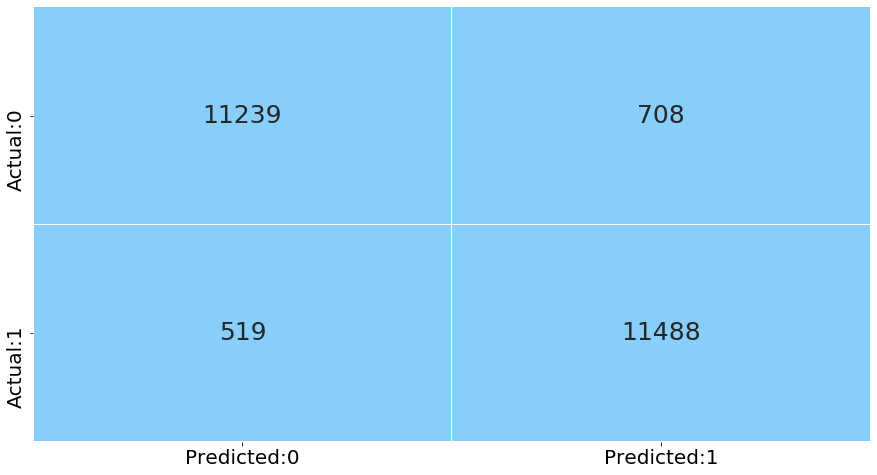

In [89]:
plot_confusion_matrix(gboost_model)

In [90]:
test_report = get_test_report(gboost_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11947
           1       0.94      0.96      0.95     12007

    accuracy                           0.95     23954
   macro avg       0.95      0.95      0.95     23954
weighted avg       0.95      0.95      0.95     23954



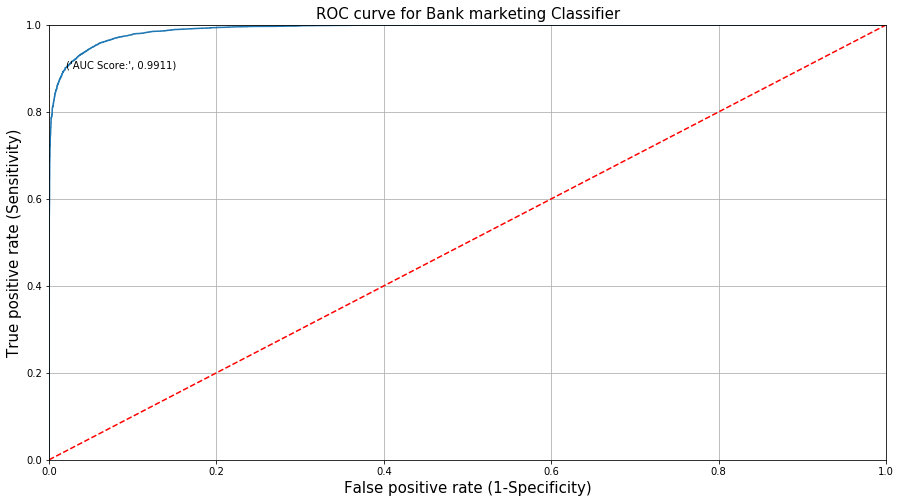

In [91]:
plot_roc(gboost_model)

In [92]:
update_score_card("Gradient boost classifier",gboost_model,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   
4    Random Forest Classifier           -      Good  0.748015 0.982624   
5         ADAboost classifier           -  Moderate  0.535607 0.952731   
6   Gradient boost classifier           -  Moderate  0.795106 0.991094   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925  
4   0.931023 0.944283  0.937004 0.874003  0.937606  
5   0.890271 0.876405  0.883902 0.767813  0.883284  
6   0.941948 0.956775  0.948777 0.897549  0.949304

<a id='xgboost'></a>

## XG Boost

In [93]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

[09:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

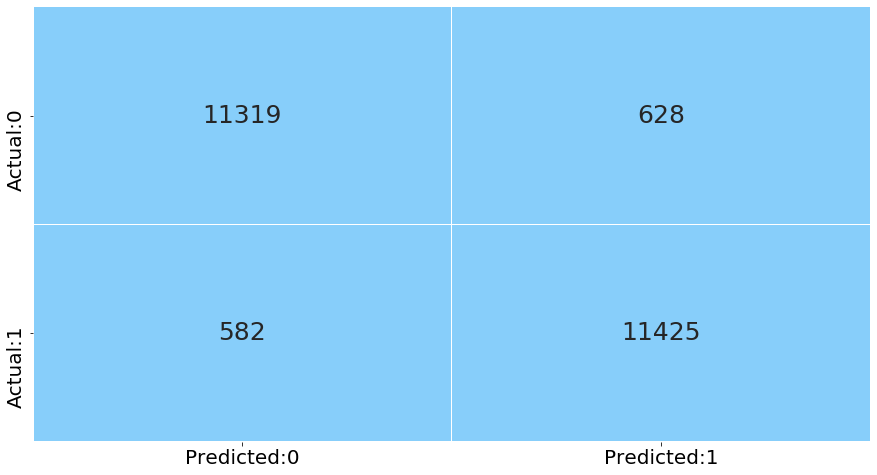

In [94]:
plot_confusion_matrix(xgb_model)

In [95]:
test_report = get_test_report(xgb_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11947
           1       0.95      0.95      0.95     12007

    accuracy                           0.95     23954
   macro avg       0.95      0.95      0.95     23954
weighted avg       0.95      0.95      0.95     23954



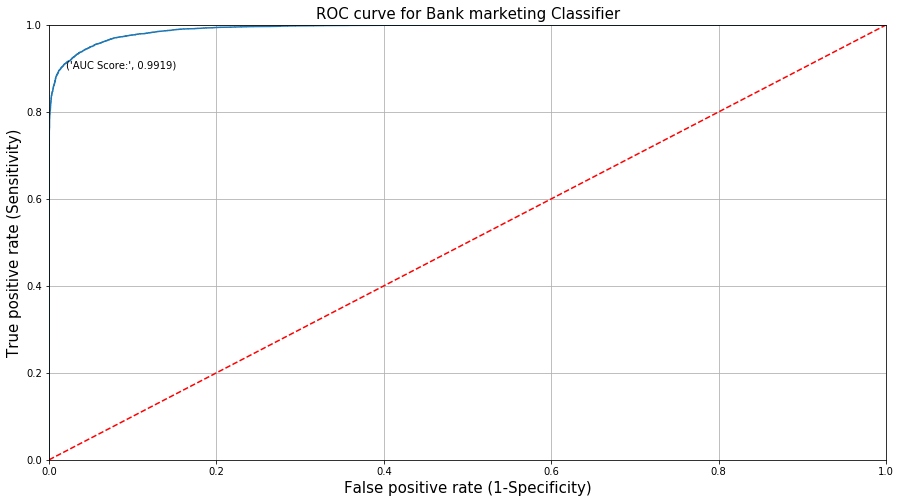

In [96]:
plot_roc(xgb_model)

In [97]:
update_score_card("XGBClassifier",xgb_model,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   
4    Random Forest Classifier           -      Good  0.748015 0.982624   
5         ADAboost classifier           -  Moderate  0.535607 0.952731   
6   Gradient boost classifier           -  Moderate  0.795106 0.991094   
7               XGBClassifier           -  Moderate  0.797945 0.991950   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925  
4   0.931023 0.944283  0.937004 0.874003  0.937606  
5   0.890271 0.876405  0.883902 0.767813  0.883284  
6   0.941948 0.956775  0.948777 0.897549  0.949304  
7   0.947897 0.951528  0.949487 0.898971  0.949709

## Stacking Classifier

In [102]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

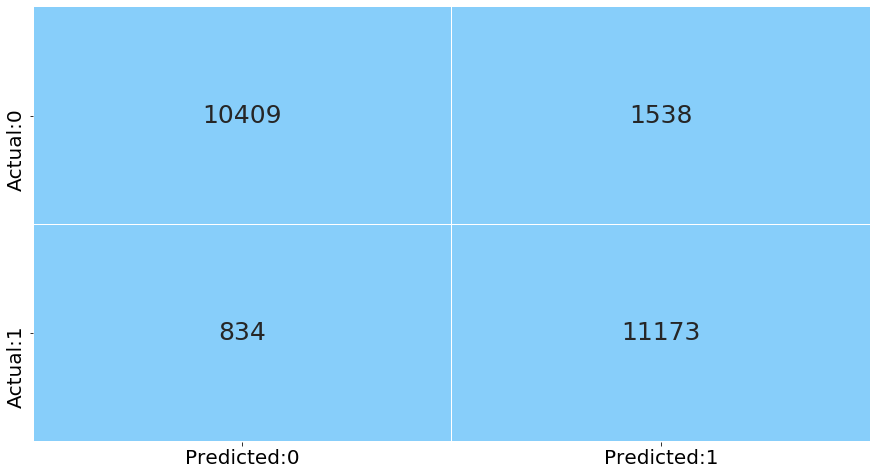

In [103]:
plot_confusion_matrix(stack_model)

In [104]:
test_report = get_test_report(stack_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     11947
           1       0.88      0.93      0.90     12007

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954



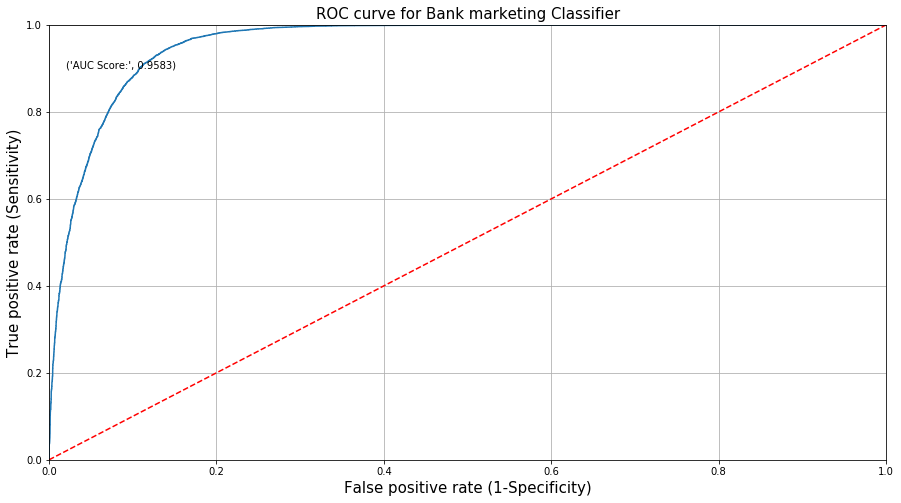

In [105]:
plot_roc(stack_model)

In [106]:
update_score_card("Stacking classifier",stack_model,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   
4    Random Forest Classifier           -      Good  0.748015 0.982624   
5         ADAboost classifier           -  Moderate  0.535607 0.952731   
6   Gradient boost classifier           -  Moderate  0.795106 0.991094   
7               XGBClassifier           -  Moderate  0.797945 0.991950   
8         Stacking classifier           -  Moderate  0.603905 0.958268   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925  
4   0.931023 0.944283  0.937004 0.874003  0.937606  
5   0.890271 0.876405  0.883902 0.767813  0.883284  
6   0.941948 0.956775  0.948777 0.897549  0.949304  
7   0.947897 0.951528  0.949487 0.898971  0.949709  
8   0.879002 0.930541  0.900977 0.801923  0.904038

<a id='knngrid'></a>
# KNN model Tuned

In [90]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



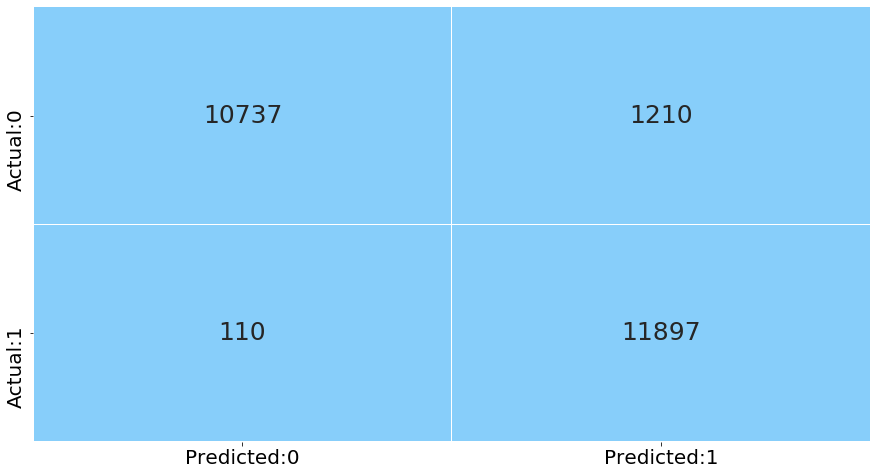

In [107]:
knn_classification = KNeighborsClassifier(metric='manhattan',n_neighbors=1)
knn_model_tuned = knn_classification.fit(X_train, y_train)
plot_confusion_matrix(knn_model_tuned)

In [109]:
print(get_test_report(knn_model_tuned))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     11947
           1       0.91      0.99      0.95     12007

    accuracy                           0.94     23954
   macro avg       0.95      0.94      0.94     23954
weighted avg       0.95      0.94      0.94     23954



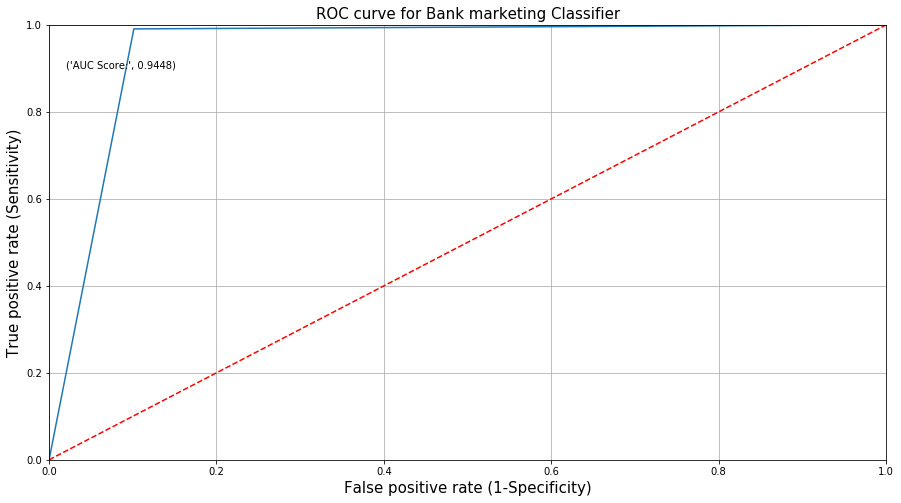

In [111]:
plot_roc(knn_model_tuned)

In [110]:
update_score_card("KNN classifier tuned",knn_model_tuned,stability="Moderate")

Model Name Prob.Cutoff Stability  r2_score      AUC  \
0  Simple Logistic Regression    0.690000    Stable  0.604316 0.957852   
1              gNB Classifier           -  Moderate  0.028799 0.827561   
2              KNN Classifier           -  Moderate  0.691073 0.957255   
3    Decision Tree Classifier           -      Good  0.651330 0.912807   
4    Random Forest Classifier           -      Good  0.748015 0.982624   
5         ADAboost classifier           -  Moderate  0.535607 0.952731   
6   Gradient boost classifier           -  Moderate  0.795106 0.991094   
7               XGBClassifier           -  Moderate  0.797945 0.991950   
8         Stacking classifier           -  Moderate  0.603905 0.958268   
9        KNN classifier tuned           -  Moderate  0.779576 0.944779   

   Precision   Recall  Accuracy    Kappa  f1-score  
0   0.949241 0.791205  0.874134 0.748371  0.863048  
1   0.740353 0.794120  0.757201 0.514311  0.766294  
2   0.874052 0.988340  0.922769 0.845486  0.927689  
3   0.904824 0.923211  0.912833 0.825656  0.913925  
4   0.931023 0.944283  0.937004 0.874003  0.937606  
5   0.890271 0.876405  0.883902 0.767813  0.883284  
6   0.941948 0.956775  0.948777 0.897549  0.949304  
7   0.947897 0.951528  0.949487 0.898971  0.949709  
8   0.879002 0.930541  0.900977 0.801923  0.904038  
9   0.907683 0.990839  0.944894 0.889763  0.947440

**Compare the performance of the Different Models built**

1. Accuracy score for selected features for different models range between 0.75 - 0.94

2. Precision Score for selected features for different models range between 0.74 - 0.95

3. Gaussian Naïve Bayes Classifier has overall low precision, recall, accuracy and kappa score compared to other models built.

4. Simple Logistic Regression for selected features has a stable nature whereas both Random Forest and Decision Tree has Good nature of stability.

**Which metric did we choose and why?**

The next step after implementing a machine learning algorithm is to find out how effective is the model based on metric and datasets. Different performance metrics are used to evaluate different Machine Learning Algorithms. For example a classifier used to distinguish between images of different objects; we can use classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc.

The machine learning model cannot be simply tested using the training set, because the output will be prejudiced, because the process of training the machine learning model has already tuned the predicted outcome to the training dataset. Therefore in order to estimate the generalization error, the model is required to test a dataset which it hasn’t seen yet; giving birth to the term testing dataset.

Therefore for the purpose of testing the model, we would require a labelled dataset. This can be achieved by splitting the training dataset into training dataset and testing dataset. This can be achieved by various techniques such as, k-fold cross validation.

**Which model has better performance on the test set?**

For binary classification model evaluation between random forest and logistic regression, our work focused on four distinct simulated datasets:    
(1) increasingthe variance in the explanatory and noise variables,     
(2) increasing the number of noise variables,     
(3) increasing the number of explanatory variables,     
(4) increasing the number of observations.

To benchmark and comparing classification scores between different classification models built, metrics such as accuracy, area under the curve, true positive rate, false positive rate, and precision were analyzed.

KNN classifier tuned has got better accuracy score compared to other models, hence we can say that it has a better performance.

# Conclusion 

According to the analysis made across, a target customer profile can be established. The most responsive customers possess following features:

-> Feature 1: age < 30 or age > 60      
-> Feature 2: students or retired people       
-> Feature 3: specific months (dec, may, oct)     

By applying the supervised learning classification techniques, using ensemble learning models, and boosting technqiues the estimation models were successfully built. With all the respective models, the bank will be able to predict a customer's response in the telemarketing campaign before calling the customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits. 